In [51]:
from minisom import MiniSom
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

data = pd.read_csv('SomXYZ.csv')
data = data.values
#moim zdaniem chyba nie potrzeba tutaj normalizować danych, ewentualnie po zmianach wartości x oraz y z jest zawsze -1 do 1
print(data.shape)

(10000, 3)


In [52]:
print(data[:,2][3])

0.2588190451025207


In [53]:
class Square:

  def __init__(self, points, x_position, y_position):
    self.points = points
    self.points_to_train = np.concatenate(self.points)
    self.x_position = x_position
    self.y_position = y_position
  def get_position(self):
    return [self.x_position, self.y_position]
    
  

In [54]:
x_values = data[:,0]
y_values = data[:,1]
z_values = data[:,2]
min_x = min(x_values)
min_y = min(y_values)
max_x = max(x_values)
max_y = max(y_values)

In [55]:
#nasz group_array nie ma sensu gdyz dzieli on listę np od recordu 0 do 50, a my poruszamy się w 3d więc musi dzielić np x: 0-5, y: 0-5
#mam na to napisaną metodę w c#
def group_array(data, x_jump, y_jump):
    x_segments_count = int((max(x_values) - min(x_values)) / x_jump)
    y_segments_count = int((max(y_values) - min(y_values)) / y_jump)
    segmented_points = []

    x = min_x
    y = min_y

    x_iterator = x_segments_count
    while(x_iterator >= 0):
       y_iterator = y_segments_count
       while(y_iterator >= 0):
          points = [point for point in data if point[0] >= x and point[0] < x + x_jump and point[1] >= y and point[1] < y+y_jump]
          x_pos = x_segments_count - x_iterator
          y_pos = y_segments_count - y_iterator
          segmented_points.append(Square(np.array(points), x_pos, y_pos))

          y += y_jump
          y_iterator = y_iterator -1
       x += x_jump
       y = min_y
       x_iterator = x_iterator - 1
    return(np.array(segmented_points))
    
squares = group_array(data,10,10)


In [56]:
import random
def randomize_square(square, randomization_percent):
    points_count = len(square.points)
    points_to_randomize = int((points_count * randomization_percent) / 100)
    random_indices = np.random.choice(range(points_count), points_to_randomize)
    for index in random_indices:
        square.points[index][2] += random.uniform(-1,1) #zmienia Z
    return square
bad_square = randomize_square(squares[0], 10)

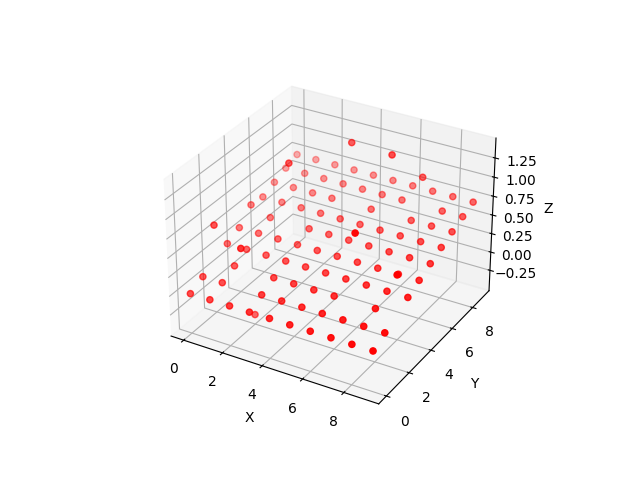

In [57]:
%matplotlib ipympl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 

# Wykres punktowy 3D
ax.scatter(bad_square.points[:,0], bad_square.points[:,1], bad_square.points[:,2], c='r', marker='o')  # c - kolor,  marker - kształt punktoru

# Ustawianie etykiet osi
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Wyświetlenie wykresu
plt.show()

In [58]:
som_3dim = squares[0].points_to_train.shape[0] #ilość wag w neuronie
points_to_train = np.array([x.points_to_train for x in squares]) #tworzenie listy składającej się z wektorów gotowych do treningu 


In [59]:
som = MiniSom(2,2, som_3dim, random_seed=42)
som.train(points_to_train, 1000)

In [60]:
print(som.winner(bad_square.points_to_train))
print(bad_square.get_position())

(0, 0)
[0, 0]
